# We will use monthly sales data from a smartphone and gadget company:

#### we will try to answer following questions :

- Which month did we achieve the best turnover?

- In which city have we recorded the most orders?

- When should we run an advertising campaign to get more sales?SAM

- Which product sells the most?

- What product combinations sell the most?

In [1]:
#import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### importing data

In [5]:
#collecte files names ( datasets)
files = [file for file in os.listdir (r'C:\Users\xps\OneDrive - UIR\Desktop\sales data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019 (1).csv
Sales_November_2019 (1).csv
Sales_October_2019.csv
Sales_September_2019.csv


In [ ]:
path = r'C:\Users\xps\OneDrive - UIR\Desktop\sales data'

# create an empty database
all_data = pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+"/"+file)
    all_data= pd.concat([all_data, current_data])
print(all_data)    

In [18]:
#put the files in the same file
all_data.to_csv(path + '/all_data.csv', index=False)


#### data exploration

In [19]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### data cleaning

In [22]:
#see missing values
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [24]:
# delete missing values
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

### Which month did we achieve the best turnover?

In [28]:
#filter the data by displaying only the month in order date
def month (x) :
    return x.split('/') [0]
all_data['Month']= all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [30]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [33]:
#filter la data en ignorant "Order date " puisque c'est pas un mois 
all_data= all_data[all_data['Month']!= 'Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [34]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [98]:
#change the data type for month from "object" to "int"
all_data["Month"]=all_data["Month"].astype(int)
all_data.dtypes

Order ID              object
Product               object
Quantity Ordered       int32
Price Each           float64
Order Date            object
Purchase Address      object
Month                  int32
 Quantity Ordered      int32
Sales                float64
City                  object
Hour                   int64
dtype: object

In [41]:
#change the data type for "price each" and "Quantity Ordered"
all_data["Price Each"]= all_data["Price Each"].astype(float)
all_data["Quantity Ordered"]= all_data["Quantity Ordered"].astype(int)

all_data.dtypes

Order ID              object
Product               object
Quantity Ordered       int32
Price Each           float64
Order Date            object
Purchase Address      object
Month                  int32
 Quantity Ordered      int32
dtype: object

In [42]:
#create a new column to calculate the turnover

all_data["Sales"]= all_data["Quantity Ordered"]*all_data["Price Each"]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,3,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,1,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,1,379.99


In [44]:
all_data.groupby("Month")["Sales"].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

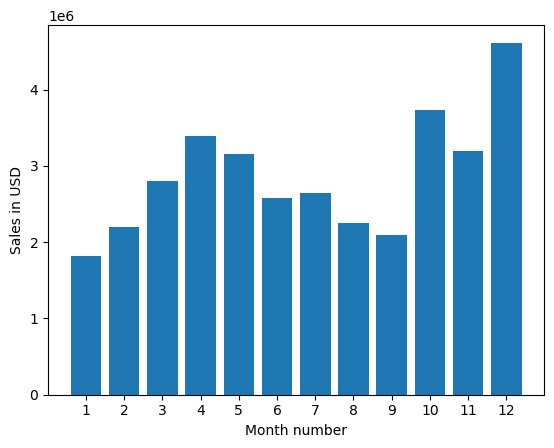

In [47]:
Months = range(1, 13)
plt.bar(Month, all_data.groupby("Month")["Sales"].sum())
plt.xticks(Months)
plt.ylabel ('Sales in USD')
plt.xlabel("Month number")
plt.show()

# In which city have we recorded the most orders?


In [54]:
# extract cities

def City(x):
    return x.split(',')[1]
all_data["City"]=all_data["Purchase Address"].apply(City)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,3,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,1,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,1,379.99,San Francisco


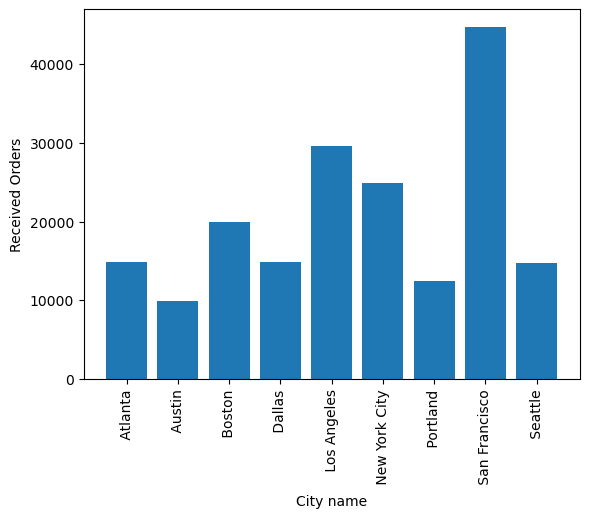

In [59]:
plt.bar(all_data.groupby("City")["City"].count().index, all_data.groupby("City")["City"].count().values)
plt.xticks(rotation="vertical")
plt.ylabel ("Received Orders")
plt.xlabel("City name")
plt.show()

In [66]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,3,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,1,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,1,379.99,San Francisco,17


In [69]:
#extract Hour 

all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,1,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,1,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,3,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,1,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,1,379.99,San Francisco,17


In [71]:
# create 2 variables 
keys = []
hours=[]
for key, hour in all_data.groupby("Hour"):
    keys.append(key)
    hours.append(len(hour))
hours    
    


[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

Text(0, 0.5, 'number of commands')

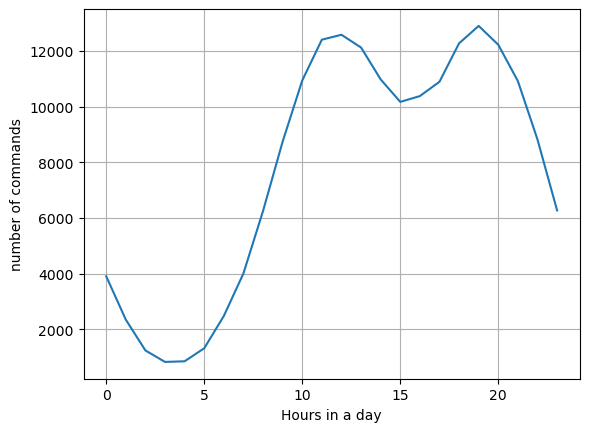

In [73]:
plt.grid()
plt.plot(keys, hours)
plt.xlabel('Hours in a day')
plt.ylabel('number of commands')

<AxesSubplot:xlabel='Product'>

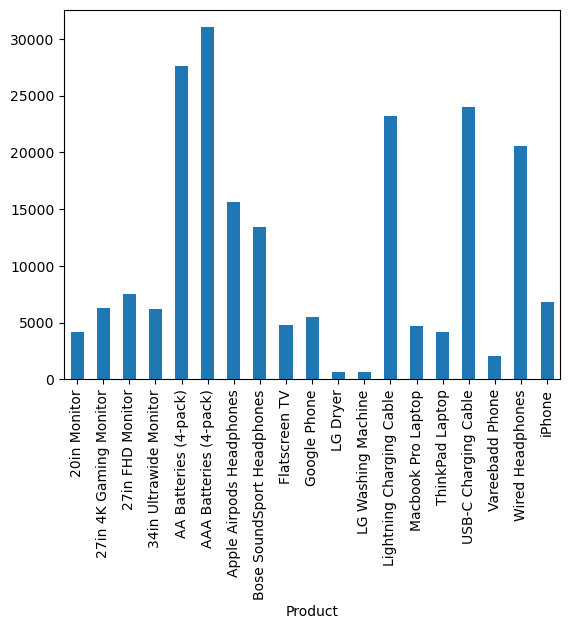

In [75]:
all_data.groupby("Product")["Quantity Ordered"].sum().plot(kind="bar")

In [76]:
#why sells the most
all_data.groupby("Product")["Price Each"].mean()


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\xps\AppData\Local\Temp\ipykernel_16560\2187357104.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Products, rotation= "vertical", size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

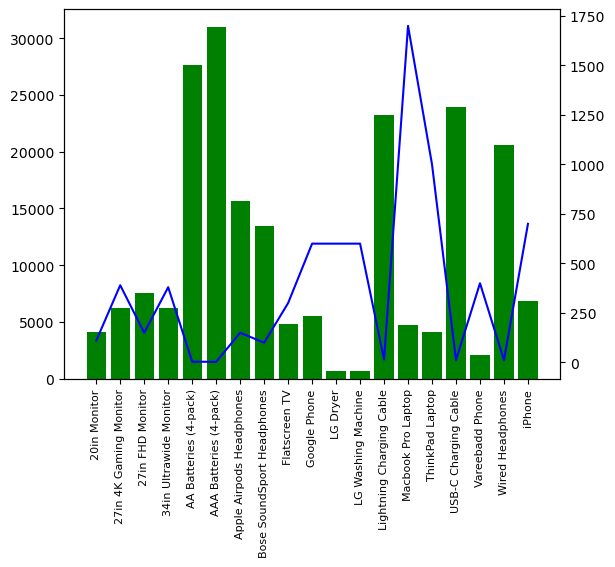

In [81]:
# sales versus price

Products = all_data.groupby("Product")["Quantity Ordered"].sum().index

Quantity = all_data.groupby("Product")["Quantity Ordered"].sum()

Prices = all_data.groupby("Product")["Price Each"].mean()
# visualizer 
plt.figure(figsize = (40, 24))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(Products, Quantity, color = "g")
ax2.plot(Products, Prices, "b-")
ax1.set_xticklabels(Products, rotation= "vertical", size=8)

In [87]:
df=all_data[all_data["Order ID"].duplicated(keep=False)]

In [91]:
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


C:\Users\xps\AppData\Local\Temp\ipykernel_16560\2117901429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


In [92]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,1,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,1,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,1,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,1,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,1,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,2,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,1,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [94]:
df.drop_duplicates(subset=["Order ID"])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quantity Ordered,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,1,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,1,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,1,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,2,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,1,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...
11617,259296,Apple Airpods Headphones,1,150.00,09/28/19 16:48,"894 6th St, Dallas, TX 75001",9,1,150.00,Dallas,16,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,1,700.00,Boston,18,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,1,379.99,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,1,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"


<AxesSubplot:ylabel='Grouped'>

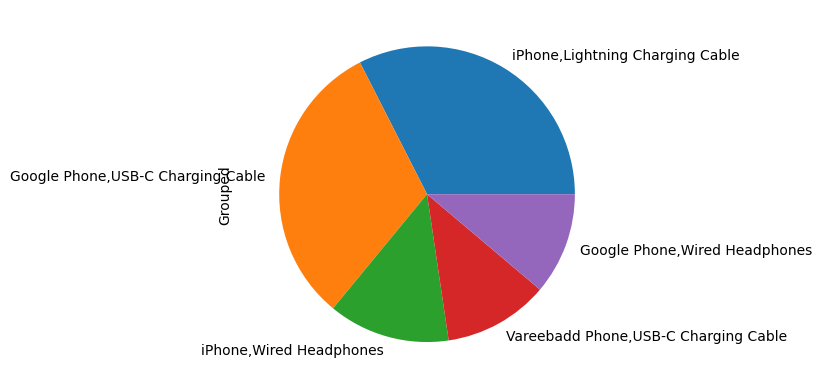

In [97]:
df["Grouped"].value_counts()[0:5].plot.pie()